梯度下降算法实现

求函数 $f(x,y) = (x - 10)^2 + (y - 10)^2$ 的极小值

迭代公式:
$(x^k,y^k) = (x^{k-1}, y^{k-1}) - \alpha \Delta f(x^{k-1}, y^{k-1})$

学习率（Learning rate）设为0.05，初始点（initial point）为（20，20）

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def function(x, y):
    """Objective function"""
    return (x - 10) ** 2 + (y - 10) ** 2

In [3]:
def gradient(x, y):
    """Gradient of the objective function"""
    grad_x = 2 * (x - 10)
    grad_y = 2 * (y - 10)
    return grad_x, grad_y

In [4]:
def gradient_descent(start_x = 20, start_y = 20, alpha = 0.05, iterations = 100):
    """Perform gradient descent and return the path"""
    x, y = start_x, start_y
    path = [(x, y, function(x, y))]
    for i in range(iterations):
        grad_x, grad_y = gradient(x, y)
        x -= alpha * grad_x
        y -= alpha * grad_y
        path.append((x, y, function(x, y)))
    return np.array(path)


In [5]:
path = gradient_descent()

In [6]:
def plot_3d_with_contour(path):
    """3D surface + path + contour lines"""
    fig = plt.figure(figsize = (10, 7))
    ax = fig.add_subplot(111, projection = "3d")

    x_range = np.linspace(0, 20, 100)
    y_range = np.linspace(0, 20, 100)
    x_grid, y_grid = np.meshgrid(x_range, y_range)
    z_grid = function(x_grid, y_grid)
    
    # Surface
    ax.plot_surface(x_grid, y_grid, z_grid, cmap = "viridis", alpha = 0.5)

    # Path
    ax.plot(path[:,0], path[:,1], path[:,2], "r--", linewidth = 1.5, label = "Path")
    ax.scatter(path[::2,0], path[::2,1], path[::2,2], c = "red", s = 15, label = "Steps")

    # Contour lines
    ax.contour(x_grid, y_grid, z_grid, 30, offset = np.min(z_grid) - 10, cmap = 'viridis', linestyles = "solid")

    ax.set_xlabel("X", usetex = False)
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    plt.title("Gradient Descent Visualization")
    plt.legend()
    plt.tight_layout()
    plt.show()


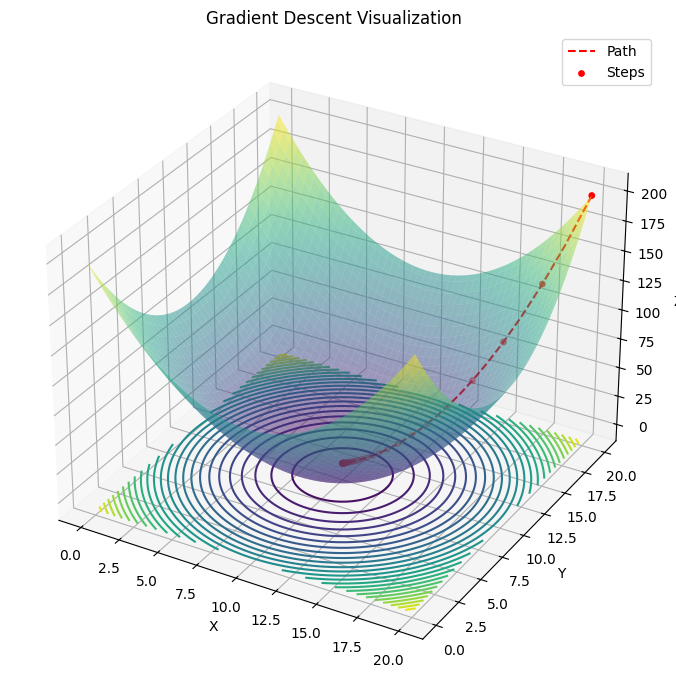

In [7]:
plot_3d_with_contour(path)

In [8]:
def plot_contour_2d(path):
    """2D contour + path"""
    x_range = np.linspace(0, 20, 100)
    y_range = np.linspace(0, 20, 100)
    
    x_grid, y_grid = np.meshgrid(x_range, y_range)
    z_grid = function(x_grid, y_grid)
    plt.figure(figsize = (8, 6))

    # Contour lines
    contour = plt.contour(x_grid, y_grid, z_grid, 30, cmap='viridis')
    plt.clabel(contour, inline = True, fontsize = 8)

    # Path
    plt.plot(path[:,0], path[:,1], 'r--o', label='Path')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Gradient Descent Path on Contour')
    plt.legend()
    plt.show()

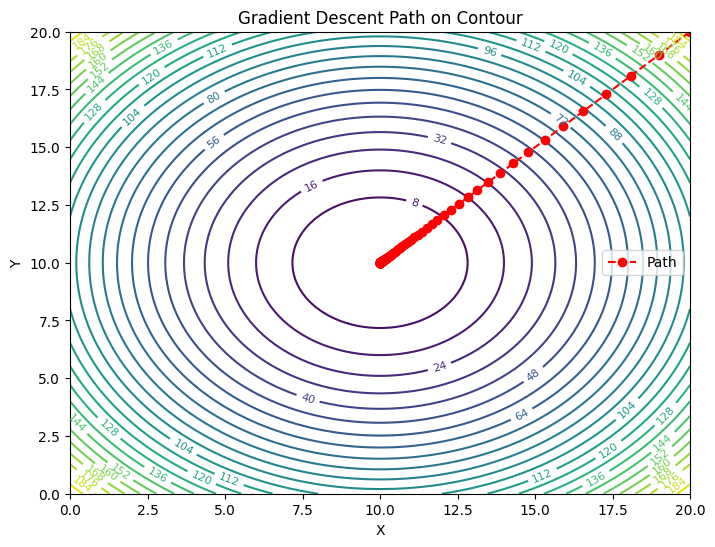

In [9]:
plot_contour_2d(path)